In [1]:
import numpy as np
from numpy import sqrt, log
import random
import matplotlib.pyplot as plt

In [2]:
directory='/Users/julnow/Desktop/szkoła/KMS/1/'
params = directory + 'params.txt'

lab 1

In [3]:
#read variables
variables = {}
with open(params) as f:
    for line in f:
        name, value = line.split(" = ")
        variables[name] = float(value)
n = int(variables['n'])
a = variables['a']
L = variables['L']
T0 =  variables['T']
R =  variables['R']
k = 8.31e-3 # Boltzman const
m = variables['m'] * 1.6605402e-27 # 1u
eps = 1
# n = 3
# T0 = 10
#kryształ
#(3)
N = n**3 
# (4)
b0 = np.array([a, 0, 0])
b1 = np.array([a/2, a*sqrt(3)/2, 0])
b2 = np.array([a/2, a*sqrt(3)/6, a*sqrt(2/3)])
# (5)
ri= np.zeros([3, N])
for i0 in range(n):
    for i1 in range(n):
        for i2 in range(n):
            i = i0 + i1 * n + i2 * n**2
            r = (i0 - (n-1)/2)*b0 +  (i1- (n-1)/2)*b1 + (i2 - (n-1)/2)*b2
            ri[:,i] = r
# (6)
ei= np.zeros([3, N])
const = - k * T0 /2
for i in range(N):
    x = const*log(random.uniform(0, 1))
    y = const*log(random.uniform(0, 1))
    z = const*log(random.uniform(0, 1))
    ei[:,i] = np.array([x, y, z])
# (7)
pi= np.zeros([3, N])
for i in range(N):
    x = sqrt(2*m*ei[0, i])
    if (random.uniform(0, 1) < .5):
        x *= -1
    y = sqrt(2*m*ei[1, i])
    if (random.uniform(0, 1) < .5):
        y *= -1
    z = sqrt(2*m*ei[2, i])
    if (random.uniform(0, 1) < .5):
        z *= -1
    pi[:,i] = np.array([x, y, z])
# (8)
Px = sum(pi[0,:])
Py = sum(pi[1,:])
Pz = sum(pi[2,:])
for i in range(N):
    pi[0,i] -= Px/N
    pi[1,i] -= Py/N
    pi[2,i] -= Pz/N

lab 2

In [4]:
def vector_average(array): # | r | 
    return sqrt(np.sum (np.square(array)))
# (9)
Vp = np.zeros([N, N])
Fi = np.zeros([3, N]) # (12)
def calculate_forces():
    global ri, Vp, Fi
    Vp = np.zeros([N, N])
    Fi = np.zeros([3, N])
    for i in range (N):
        for j in range(i+1, N):
            ri_rj = ri[:,i] - ri[:,j] # x, y, z difference
            r = vector_average(ri_rj) #sum of squares of x,y,z differences
            vp_ij = eps*( pow((R/r), 12) - 2* pow((R/r),6) )
            Vp[i, j] = vp_ij
            fi = 12* vp_ij * ri_rj / r**2 # (13)
            Fi[:, i] += fi
            Fi[:, j] -= fi
            # print (' fi ' + str(fi))    
calculate_forces()
f = 1e4
# (10)
Vs = np.zeros([N])
P = 0 # (15)
V = 0
def pressure():
    global Vs, P, V, Fi
    P = 0
    V = 0
    Vs = np.zeros([N])
    for i in range (N):
        r = vector_average(ri[:,i])
        if (r < L):
            Vs[i] = 0
        else:
            Vs[i] = f*pow((r-L),2)/2
            # print ('r-L = ' + str(r-L))
            Fi[:, i] += f*(L-r) * (ri[:,i] / r) # (14)
        P = vector_average(Fi[:, i]) / 4/ 3.14 / L**2 # (15)
    V = np.sum(Vs) + np.sum(Vp) # (11)
    # print ('V = ' + str(V))
pressure()
print ('V = ' + str(V))
print ('P = ' + str(P))
# (16)
H = 0 #hamiltionian
def hamiltionian():
    global H
    H = 0 
    for i in range(N):
        p = vector_average(pi[:, i])
        if (p > 0.001):
            H += p**2 /2/m
    H += V
hamiltionian()

V = -669.2932036253529
P = 1.0580443725813808


Lab 3

In [5]:
tau = 2e-13 # dodac do pliku
S_0 = 10
S_d = 50
S_out = 10
S_xyz = 10

T = 0
def simulation():
    global ri, pi, T
    E_kin = 0 # (19)
    for i in range(N):
        # (17 a)
        Fi_tau = Fi[:, i]* tau/2 
        # print('Fi_tau = ' + str(Fi_tau))
        pi_tau2 =  pi[:,i] + Fi_tau 
        # (17 b)
        ri[:,i] = pi_tau2*tau / m
    print('T = ' + str(T))
    calculate_forces() # recalculate forces
    pressure()
    print('P = ' + str(P))
    hamiltionian()
    print('H = ' + str(H))
    for i in range(N):
        # (17 c)
        Fi_tau = Fi[:, i]* tau/2
        pi_tau2 =  pi[:,i] + Fi_tau 
        pi[:,i] = pi_tau2 + Fi_tau * tau /2
        # (19)
        p = vector_average(pi[:, i])
        E_kin += p**2 /2/m
    T = 2 / (3*N*k)  * E_kin # (19)
# simulation()

In [6]:
'''simulation'''
for i in range (S_0):
    simulation()
T_bar, P_bar, H_bar = 0, 0, 0 # (20)
for i in range (S_d):
    simulation()
    T_bar += T
    P_bar += P
    H_bar += H
def bar(var, name):
    var = var /S_d
    print(r'$\overline{' + name + r'}$ = ' + str(var))
bar(T_bar, 'T')
bar(P_bar, 'P')
bar(H_bar, 'H')

T = 0
P = 2867.372560030878
H = 385654753.4212757
T = 372637960045.37695
P = 17267390.91643287
H = 1.7111010661832668e+43
T = 3.2508198513104255e+94
P = 103977953543.49304
H = 1.2201797835067427e+99
T = 1.178555043393755e+102
P = 626117460340155.6
H = 4.4243850381428024e+106
T = 4.27345342945715e+109
P = 3.7702518734305674e+18
H = 1.604286813731937e+114
T = 1.5495588487103827e+117
P = 2.270308702361395e+22
H = 5.817161387450385e+121
T = 5.618717192676672e+124
P = 1.3670974187005601e+26
H = 2.1093090286596315e+129
T = 2.037352948392665e+132
P = 8.232163979611213e+29
H = 7.648377416489525e+136
T = 7.38746388897161e+139
P = 4.957110068397538e+33
H = 2.7733099470132917e+144
T = 2.678702418936064e+147
P = 2.9849915880039075e+37
H = 1.0056051948509905e+152
T = 9.713004025543597e+154
P = 1.7974534875184732e+41
H = 3.646335343802277e+159
T = 3.5219457948485886e+162
P = 1.0823611874741713e+45
H = 1.3221651506515758e+167
T = 1.2770613652821426e+170
P = 6.517585841778051e+48
H = 4.794185177095153

/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_24733/2335674014.py:36: RuntimeWarning: overflow encountered in double_scalars
  Vs[i] = f*pow((r-L),2)/2
/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_24733/2335674014.py:2: RuntimeWarning: overflow encountered in square
  return sqrt(np.sum (np.square(array)))
/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_24733/2326221801.py:31: RuntimeWarning: overflow encountered in double_scalars
  E_kin += p**2 /2/m
/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_24733/2335674014.py:38: RuntimeWarning: invalid value encountered in multiply
  Fi[:, i] += f*(L-r) * (ri[:,i] / r) # (14)
/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_24733/2335674014.py:53: RuntimeWarning: overflow encountered in double_scalars
  H += p**2 /2/m


P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
T = nan
P = nan
H = nan
$\overline{T}$ = nan
$\overline{P}$ = nan
$\overline{H}$ = nan


/opt/homebrew/Caskroom/miniforge/base/envs/pw/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/homebrew/Caskroom/miniforge/base/envs/pw/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

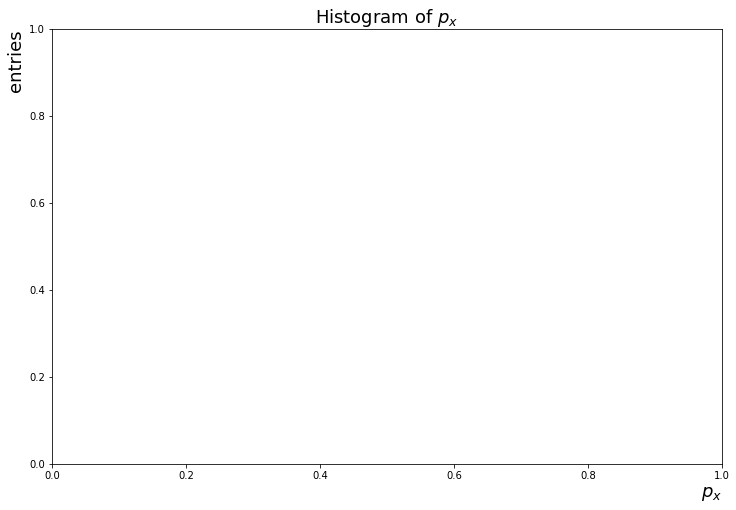

In [7]:
#plot histograms for momenta
coords = ['x', 'y', 'z']
count = 0
for coord in coords:
    fig, ax = plt.subplots(figsize=(12,8))
    name = r'$p_{' + coord + r'}$'
    plt.title(r'Histogram of ' + name , fontsize=18)
    plt.xlabel(name, fontsize=18, loc='right')
    plt.ylabel("entries", fontsize=18, loc='top')
    #plt.yscale('log')
    plt.hist(pi[count, :], bins=100)
    ax.tick_params(axis='both', which='major', labelsize=14)
    fig.tight_layout()
    count += 1

In [ ]:
#create xyz file with positions
file_xyz = open(directory+'kms1.xyz',"w+")
file_xyz.write(' '+ str(N) + '\n\n')
for i in range(N):
    line = 'Ar' +  ' '
    x = ri[0, i]
    y = ri[1, i]
    z = ri[2, i]
    line += ' ' + str(x) + ' ' + str(y) + ' ' + str(z) + '\n'
    file_xyz.write(line)
file_xyz.close()